In [13]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [3]:
train_data = pd.read_csv('/Users/pankaj/Downloads/jigsaw-toxic-comment-classification-challenge/train.csv')
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [95]:
X_train = train_data['comment_text']
y = train_data.loc[:, train_data.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [96]:
# Prepare training input  
maxlen = 100
training_samples = 20000
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
x_train = data[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]

Found 210337 unique tokens.
Shape of data tensor: (159571, 100)


In [97]:
# Prepare labels 
labels = np.asarray(y)
print('Shape of label tensor:', labels.shape)
labels = labels[indices]
y_train = labels[:training_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of label tensor: (159571, 6)


In [114]:
from tensorflow.keras.layers import LSTM
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 198       
Total params: 1,018,278
Trainable params: 1,018,278
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 22s 35ms/step - loss: 0.1095 - acc: 0.9423 - val_loss: 0.0697 - val_acc: 0.9877
Epoch 2/10
625/625 [==============================] - 22s 34ms/step - loss: 0.0625 - acc: 0.9916 - val_loss: 0.0585 - val_acc: 0.9944
Epoch 3/10
625/625 [==============================] - 21s 34ms/step - loss: 0.0539 - acc: 0.9945 - val_loss: 0.0596 - val_acc: 0.9944
Epoch 4/10
625/625 [==============================] - 22s 34ms/step - loss: 0.0505 - acc: 0.9946 - val_loss: 0.0634 - val_acc: 0.9944
Epoch 5/10
625/625 [==============================] - 21s 34ms/step - loss: 0.0481 - acc: 0.9945 - val_loss: 0.0572 - val_acc: 0.9944
Epoch 6/10
625/625 [==============================] - 22s 36ms/step - loss: 0.0459 - acc: 0.9945 - val_loss: 0.0553 - val_acc: 0.9944
Epoch 7/10
625/625 [==============================] - 21s 33ms/step - loss: 0.0438 - acc: 0.9944 - val_loss: 0.0591 - val_acc: 0.9944
Epoch 8/10
625/625 [==============================] - 23s 37ms

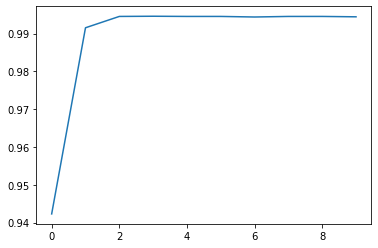

In [117]:
import matplotlib.pyplot as plt
plt.plot(range(10), history.history['acc'])

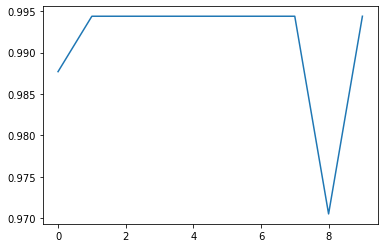

In [118]:
import matplotlib.pyplot as plt
plt.plot(range(10), history.history['val_acc'])

In [119]:
# test data 
test_data = pd.read_csv('/Users/pankaj/Downloads/jigsaw-toxic-comment-classification-challenge/test.csv')
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [120]:
X_test = test_data['comment_text']
sequences_test = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index
test_data = pad_sequences(sequences_test, maxlen=maxlen)

In [121]:
predictions = model.predict(test_data)

In [122]:
predictions.shape

(153164, 6)

In [150]:
test_data1 = pd.read_csv('/Users/pankaj/Downloads/jigsaw-toxic-comment-classification-challenge/test.csv')
result = pd.DataFrame(predictions)
result['id'] = test_data1['id']

In [151]:
a=['id']
a.extend(list(range(0,6)))
a
result=result[a]
result = result.rename(dict(zip(range(0,6), ['toxic','severe_toxic','obscene','threat','insult','identity_hate'])), axis =1)
result.to_csv('result.csv')

In [152]:
result.to_csv('result.csv', index=False)

In [133]:
predictions.shape

(153164, 6)

In [124]:
test_labels = pd.read_csv('/Users/pankaj/Downloads/jigsaw-toxic-comment-classification-challenge/test_labels.csv')
test_labels.loc[21]

id               00091c35fa9d0465
toxic                           1
severe_toxic                    0
obscene                         0
threat                          0
insult                          0
identity_hate                   0
Name: 21, dtype: object

In [44]:
pred =  predictions>0.5

In [52]:
compare = test_labels[pred]['toxic']

In [54]:
compare = compare[compare!=-1]

In [60]:
sum(pred)/sum(compare[compare==1])

array([8.15354874])

In [62]:
sum(compare[compare==1])

3621

In [77]:
 X_test['pred'] = pd.Series(predictions.T[0])>0.5

In [87]:
X_test

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
pred      0          True
1         False
2         Fals...
Name: comment_text, Length: 153165, dtype: object